In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data = pd.read_csv('AIDS_Classification_5000.csv')

In [ ]:
data.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,988,2,42,71.76131,0,0,0,100,0,1,...,1,3,0,0,0,290,408,1870,1671,0
1,413,3,30,72.67629,0,1,0,100,0,1,...,0,1,0,0,0,506,446,1372,523,0
2,1119,0,37,73.75514,0,1,0,90,0,1,...,1,3,0,0,0,499,542,609,1474,0
3,680,3,34,70.03769,0,0,0,100,0,0,...,0,1,0,1,0,313,478,780,987,0
4,1043,3,35,63.02845,0,0,0,100,0,1,...,0,1,0,1,0,337,761,698,1735,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
time,0
trt,0
age,0
wtkg,0
hemo,0
homo,0
drugs,0
karnof,0
oprior,0
z30,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      5000 non-null   int64  
 1   trt       5000 non-null   int64  
 2   age       5000 non-null   int64  
 3   wtkg      5000 non-null   float64
 4   hemo      5000 non-null   int64  
 5   homo      5000 non-null   int64  
 6   drugs     5000 non-null   int64  
 7   karnof    5000 non-null   int64  
 8   oprior    5000 non-null   int64  
 9   z30       5000 non-null   int64  
 10  preanti   5000 non-null   int64  
 11  race      5000 non-null   int64  
 12  gender    5000 non-null   int64  
 13  str2      5000 non-null   int64  
 14  strat     5000 non-null   int64  
 15  symptom   5000 non-null   int64  
 16  treat     5000 non-null   int64  
 17  offtrt    5000 non-null   int64  
 18  cd40      5000 non-null   int64  
 19  cd420     5000 non-null   int64  
 20  cd80      5000 non-null   int6

In [ ]:
data.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,...,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,881.382400,1.375200,34.239800,75.941660,0.033000,0.648000,0.137000,96.893400,0.040600,0.64020,...,0.574400,1.94400,0.081400,0.730800,0.334200,319.791600,436.361600,1048.853000,906.292000,0.31580
std,303.774994,1.235609,6.985732,12.448553,0.178654,0.477642,0.343882,5.013608,0.197381,0.47999,...,0.494483,0.89321,0.273476,0.443588,0.471757,102.370123,141.871757,491.375973,340.454917,0.46488
min,124.000000,0.000000,12.000000,44.424990,0.000000,0.000000,0.000000,78.000000,0.000000,0.00000,...,0.000000,1.00000,0.000000,0.000000,0.000000,115.000000,119.000000,252.000000,236.000000,0.00000
25%,552.000000,0.000000,29.000000,68.039777,0.000000,0.000000,0.000000,90.000000,0.000000,0.00000,...,0.000000,1.00000,0.000000,0.000000,0.000000,236.000000,325.000000,712.000000,649.000000,0.00000
50%,1044.500000,1.000000,34.000000,74.009940,0.000000,1.000000,0.000000,100.000000,0.000000,1.00000,...,1.000000,2.00000,0.000000,1.000000,0.000000,298.000000,416.000000,891.000000,858.000000,0.00000
75%,1136.000000,3.000000,39.000000,81.224572,0.000000,1.000000,0.000000,100.000000,0.000000,1.00000,...,1.000000,3.00000,0.000000,1.000000,1.000000,398.000000,526.000000,1243.250000,1075.000000,1.00000
max,1231.000000,3.000000,62.000000,142.881280,1.000000,1.000000,1.000000,100.000000,1.000000,1.00000,...,1.000000,3.00000,1.000000,1.000000,1.000000,716.000000,1104.000000,4922.000000,3055.000000,1.00000


In [ ]:
data = data.drop(columns=['wtkg','hemo','cd820','gender'])

In [ ]:
data.shape

(5000, 19)

In [ ]:
# shuffle data
data = data.sample(frac=1)
data = data.reset_index(drop=True)  # reet index after shuffling

In [ ]:
data.head()

,time,trt,age,homo,drugs,karnof,oprior,z30,preanti,race,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,infected
0,1102,0,36,1,0,90,0,1,456,0,1,2,0,1,0,287,370,1061,0
1,1120,2,28,1,0,90,0,1,290,0,1,3,0,1,0,266,451,1038,1
2,334,3,51,1,0,90,0,0,5,1,0,1,0,1,0,298,511,1006,0
3,527,2,42,1,0,100,1,1,351,0,1,2,0,1,0,350,688,718,1
4,1151,3,26,0,0,100,0,1,129,1,1,3,0,1,0,283,337,1213,1


In [ ]:
data['infected'].value_counts()

,count
infected,
0,3421
1,1579


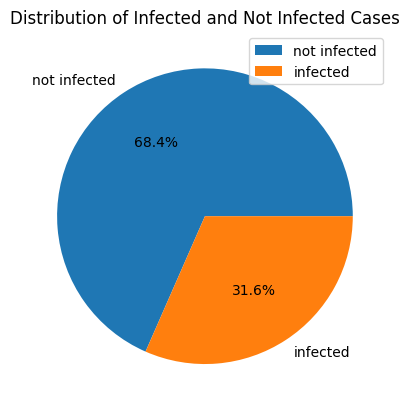

In [ ]:
infected_counts = data['infected'].value_counts()

plt.pie(infected_counts, labels=["not infected", "infected"], autopct="%1.1f%%")
plt.legend()
plt.title("Distribution of Infected and Not Infected Cases")
plt.show()

In [ ]:
X = data.drop('infected', axis=1) # use all columns except 'target' as features
Y = data['infected']

In [ ]:
X.shape, Y.shape

((5000, 18), (5000,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 75, 100, 150, 200],         # Focus on fewer trees due to dataset size
    'max_depth': [5, 7, 10, 15, 50],         # Explore shallow and fully grown trees
    'max_features': ['sqrt', 'log2'],     # Use subsets of features for splits
    'min_samples_split': [2, 5, 10],       # Control node splits
    'class_weight': ['balanced']        # Adjust weights to handle the slight imbalance.
}

In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

In [ ]:
# Perform Grid Search
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [5, 7, 10, 15, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 75, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
# Extract results
results = pd.DataFrame(grid_search.cv_results_)

In [ ]:
# Select relevant columns for meta-dataset
meta_dataset = results[['param_n_estimators', 'param_max_depth', 'param_max_features', 'param_min_samples_split',
                        'mean_test_score']]

In [ ]:
# Rename columns for clarity
meta_dataset.rename(columns={
    'param_n_estimators': 'n_estimators',
    'param_max_depth': 'max_depth',
    'param_max_features': 'max_features',
    'param_min_samples_split': 'min_samples_split',
    'mean_test_score': 'accuracy'
}, inplace=True)


<ipython-input-27-584a53431e15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_dataset.rename(columns={


In [ ]:
# Add meta-features of the dataset
meta_features = {
    'num_features': X.shape[1],
    'num_samples': X.shape[0],
    'class_imbalance_ratio': Y.value_counts().max() / Y.value_counts().min(),
    'num_classes': len(Y.unique())
}

In [ ]:
for feature, value in meta_features.items():
    meta_dataset[feature] = value

<ipython-input-29-efeef45cdee3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_dataset[feature] = value
<ipython-input-29-efeef45cdee3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_dataset[feature] = value
<ipython-input-29-efeef45cdee3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [ ]:
# Display the meta-dataset
print(meta_dataset.head())

   n_estimators  max_depth max_features  min_samples_split  accuracy  \
0            50          5         sqrt                  2  0.645067   
1            75          5         sqrt                  2  0.646400   
2           100          5         sqrt                  2  0.646133   
3           150          5         sqrt                  2  0.643200   
4           200          5         sqrt                  2  0.645333   

   num_features  num_samples  class_imbalance_ratio  num_classes  
0            18         5000               2.166561            2  
1            18         5000               2.166561            2  
2            18         5000               2.166561            2  
3            18         5000               2.166561            2  
4            18         5000               2.166561            2  


In [ ]:
# Save the meta-dataset to a CSV file for later use
meta_dataset.to_csv('meta_dataset_aids.csv', index=False)